<h1>Análisis de Inferencia Estadística en el Mercado de Alojamientos de Airbnb en Berlín, Alemania: Una Exploración de Muestras y Población</h1>
Por Víctor González

<h2>Introducción</h2>

El impacto de plataformas de alojamiento como Airbnb en ciudades globales como Berlín, Alemania, ha sido profundo y multifacético. Estas plataformas han redefinido la dinámica del mercado de hospedaje al permitir a los propietarios de viviendas particulares ofrecer sus propiedades a turistas y visitantes a corto plazo, a menudo proporcionando una alternativa más flexible y económica a los alojamientos tradicionales. Sin embargo, junto con los beneficios evidentes, surgen desafíos significativos, como la regulación urbana, el impacto en los precios de la vivienda local y la cohesión comunitaria.

En el caso específico de Berlín, el auge de Airbnb ha suscitado debates acalorados sobre la sostenibilidad del turismo urbano, la preservación del tejido social y la equidad en el acceso a la vivienda. En este contexto complejo, la inferencia estadística emerge como una herramienta fundamental para comprender la naturaleza y las implicaciones de este fenómeno. A través del análisis de muestras representativas de las propiedades listadas en Airbnb, podemos extrapolar conclusiones sobre la población más amplia de alojamientos en la ciudad. Esto no solo nos permite evaluar características clave como los precios, la ubicación geográfica y las preferencias de los huéspedes, sino que también nos ofrece perspectivas críticas sobre cómo estas propiedades se integran en el tejido urbano existente y afectan tanto a residentes locales como a visitantes.

Este estudio explorará cómo la aplicación rigurosa de técnicas de inferencia estadística puede iluminar la dinámica compleja entre las muestras de alojamientos de Airbnb y la población general de Berlín. Al hacerlo, no solo aspira a informar a los formuladores de políticas urbanas, sino también a proporcionar una base sólida para la planificación futura y la gestión sostenible del crecimiento turístico en la ciudad.

<h2>Contexto</h2>

En la práctica del análisis de datos, una tarea típica es deducir conclusiones sobre algún aspecto desconocido de una población de interés basándonos en datos observados que son una muestra de esa población; generalmente no tenemos datos de toda la población. Las preguntas de análisis de datos sobre cómo se extienden los resúmenes, patrones, tendencias o relaciones en un conjunto de datos a la población más amplia se llaman preguntas inferenciales. Vamos a iniciar con las ideas fundamentales del muestreo de poblaciones y luego introducirá dos técnicas comunes en inferencia estadística: la estimación puntual y la estimación por intervalos.

<h3>Estimación Puntual</h3>
La estimación puntual consiste en utilizar un único valor numérico para aproximar el parámetro desconocido de interés en la población. Este valor se calcula a partir de los datos muestrales y se utiliza como una estimación directa del parámetro poblacional. Por ejemplo, si estamos interesados en la media poblacional de una cierta variable (como el precio promedio de los alojamientos de Airbnb en Berlín), podemos calcular la media muestral y utilizarla como estimación puntual de la media poblacional.

<h3>Estimación por Intervalos</h3>
La estimación por intervalos, también conocida como intervalo de confianza, proporciona un rango de valores dentro del cual se espera que esté contenido el parámetro poblacional desconocido con cierto nivel de confianza. Este intervalo se calcula a partir de los datos muestrales y tiene en cuenta la variabilidad de la muestra y el tamaño de la muestra.

<h2>Código en Python</h2>

Para trabajar en Python debemos importar las librerias que vamos a utilizar para cargar los datos y poder analizarlos.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd

Los datos esta disponible para descargar directamente desde el repositorio de <a href='https://data.insideairbnb.com/germany/be/berlin/2024-03-24/data/listings.csv.gz'>Inside Airbnb</a>. Inside Airbnb es un proyecto independiente que recopila y analiza datos públicos de la plataforma Airbnb con el objetivo de proporcionar transparencia y comprensión sobre el impacto de Airbnb en diferentes ciudades de todo el mundo. Este proyecto utiliza técnicas de extracción de datos para obtener información detallada sobre las listas de alojamientos, incluyendo detalles como precios, ubicaciones, disponibilidad y tipos de propiedades ofrecidas.

Se puede observar las primeras 5 filas del conjunto de datos y su dimensión.

In [2]:
data = pd.read_csv('listings.csv')
display(data.shape)
display(data.head())


(13362, 75)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20240324214732,2024-03-25,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,...,4.69,4.92,4.62,First name and Last name: Nicolas Krotz <br/> ...,f,1,1,0,0,0.82
1,9991,https://www.airbnb.com/rooms/9991,20240324214732,2024-03-25,city scrape,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,...,5.00,4.86,4.86,03/Z/RA/003410-18,f,1,1,0,0,0.07
2,14325,https://www.airbnb.com/rooms/14325,20240324214732,2024-03-25,city scrape,Studio Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,NaN,https://a0.muscache.com/pictures/508703/24988a...,55531,...,4.85,4.60,4.45,NaN,f,4,4,0,0,0.16
3,16644,https://www.airbnb.com/rooms/16644,20240324214732,2024-03-25,city scrape,In the Heart of Berlin - Kreuzberg,Light and sunny 2-Room-turn of the century-fla...,Our Part of Kreuzberg is just the best. Good v...,https://a0.muscache.com/pictures/73759174/e2ef...,64696,...,4.86,4.67,4.71,NaN,f,2,2,0,0,0.29
4,17904,https://www.airbnb.com/rooms/17904,20240324214732,2024-03-25,city scrape,Beautiful Kreuzberg studio - 3 months minimum,"- apt is available starting September 1, 2024<...",NaN,https://a0.muscache.com/pictures/d9a6f8be-54b9...,68997,...,4.92,4.87,4.65,NaN,f,1,1,0,0,1.74


Estas columnas proporcionan una vista detallada de las características de los alojamientos, la información del anfitrión, las reseñas de los huéspedes y la disponibilidad del alojamiento en el tiempo.

In [3]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

En el contexto de nuestros conjunto de datos contiene información detallada sobre los alojamientos de Airbnb en la ciudad de Berlín. Para nuestro estudio, nos centraremos en las siguientes columnas clave:

- id: Identificador único del alojamiento.
- eighbourhood: Vecindario donde se encuentra el alojamiento en Berlín.
- room_type: Tipo de habitación ofrecida (completa, privada, compartida).
- accommodates: Capacidad máxima de huéspedes permitidos en el alojamiento.
- bathrooms: Número de baños disponibles en el alojamiento.
- bedrooms: Número de dormitorios disponibles en el alojamiento.
- beds: Número de camas disponibles en el alojamiento.
- price: Precio por noche del alojamiento en euros.

Estas columnas nos proporcionan información esencial para analizar y comparar diferentes alojamientos en los diversos vecindarios de Berlín, considerando su capacidad, comodidades y precio. Este enfoque nos permitirá entender mejor la oferta de alojamientos en la ciudad y su distribución en función de diferentes características clave.

In [4]:
data = data[['id','neighbourhood','room_type','accommodates','bathrooms','bedrooms','beds','price']]

Nuestro nuevo conjunto de datos contiene información de 13,362 listados de alojamientos de Airbnb en Berlín. A continuación, se muestra una pequeña muestra de los datos disponibles:

In [5]:
display(data.columns)
display(data.shape)
display(data.head())

Index(['id', 'neighbourhood', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price'],
      dtype='object')

(13362, 8)

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,3176,"Berlin, Germany",Entire home/apt,4,1.0,1.0,2.0,$83.00
1,9991,"Berlin, Germany",Entire home/apt,7,2.5,4.0,7.0,$180.00
2,14325,NaN,Entire home/apt,1,1.0,0.0,1.0,$70.00
3,16644,"Berlin, Germany",Entire home/apt,4,1.0,1.0,1.0,$90.00
4,17904,NaN,Entire home/apt,2,1.0,0.0,1.0,$25.00


Estos datos nos permitirán realizar un análisis detallado sobre la distribución y características de los alojamientos en diferentes vecindarios de Berlín, considerando variables como el tipo de habitación, capacidad de alojamiento, número de baños y dormitorios, camas disponibles y precios por noche.

In [6]:
data['price'] = pd.to_numeric(data['price'].str.replace('$','').str.replace(',',''))
display(data.head())

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,3176,"Berlin, Germany",Entire home/apt,4,1.0,1.0,2.0,83.0
1,9991,"Berlin, Germany",Entire home/apt,7,2.5,4.0,7.0,180.0
2,14325,NaN,Entire home/apt,1,1.0,0.0,1.0,70.0
3,16644,"Berlin, Germany",Entire home/apt,4,1.0,1.0,1.0,90.0
4,17904,NaN,Entire home/apt,2,1.0,0.0,1.0,25.0


En nuestro análisis de datos, realizamos una conversión de la columna "price" para transformar el tipo de dato de string (texto) a numérico. Esta conversión es necesaria para poder realizar cálculos matemáticos y estadísticos con los precios de los alojamientos.

La columna "price" inicialmente contiene valores en formato de texto que incluyen caracteres como "$" y "," (por ejemplo, "$100,00"). Estos caracteres no son compatibles con las operaciones numéricas directas y deben eliminarse antes de convertir los valores a formato numérico.

El proceso de conversión implica los siguientes pasos:

Eliminación de caracteres: Borramos los caracteres especiales como "$" y "," de cada valor en la columna "price".

Conversión a numérico: Convertimos los valores limpios a un formato numérico (por ejemplo, 100.00).

Este procedimiento nos permite calcular estadísticas como promedios, medianas, y realizar visualizaciones y análisis más avanzados sobre los precios de los alojamientos en Berlín. La transformación de datos asegura que nuestras conclusiones sean precisas y estén basadas en datos numéricos adecuados para su interpretación estadística.

In [7]:
data["room_type"].value_counts(normalize=True)

room_type
Entire home/apt    0.661278
Private room       0.318066
Shared room        0.011450
Hotel room         0.009205
Name: proportion, dtype: float64

Supongamos que las autoridades municipales desean obtener información sobre los alquileres de Airbnb para ayudar en la planificación de normativas urbanas. Específicamente, desean conocer cuántos lugares de Airbnb se listan como apartamentos o casas completas (en lugar de habitaciones privadas o compartidas). Por lo tanto, les interesa estimar la verdadera proporción de todos los listados de Airbnb donde el tipo de habitación se indica como "apartamento completo o casa".

Aunque generalmente no tenemos acceso a toda la población de datos, podemos imaginar (para fines de aprendizaje) que nuestro conjunto de datos representa la población completa de todos los listados de alquileres de Airbnb en Berlín, Alemania. Para encontrar la proporción de listados para cada tipo de habitación, podemos utilizar la función value_counts con el parámetro normalize.

Las proporciones de cada tipo de habitación basadas en el conjunto de datos:

- Entire home/apt (Apartamento completo o casa): Esta categoría representa aproximadamente el 66.13% de todos los listados. Esto significa que más de dos tercios de los alojamientos disponibles en Airbnb en Berlín son apartamentos completos o casas que los huéspedes pueden alquilar por completo.

- Private room (Habitación privada): Cerca del 31.81% de los listados corresponden a habitaciones privadas. Estos son espacios dentro de una vivienda donde los huéspedes pueden tener su propia habitación privada, pero comparten otras áreas como cocina y baño con el anfitrión o con otros huéspedes.

- Shared room (Habitación compartida): Solo el 1.15% de los listados son habitaciones compartidas. En este caso, los huéspedes comparten el espacio de la habitación con otros huéspedes que pueden ser desconocidos para ellos.

- Hotel room (Habitación de hotel): Este tipo de alojamiento representa aproximadamente el 0.92% de los listados. Son habitaciones dentro de hoteles que se ofrecen en plataformas como Airbnb.

Estas proporciones proporcionan una visión clara de la diversidad de opciones de alojamiento disponibles en Airbnb en Berlín, destacando la predominancia de apartamentos completos o casas en comparación con habitaciones privadas, habitaciones compartidas y habitaciones de hotel.

<h2>Exploración mediante Muestra Aleatoria:</h2>

En lugar de utilizar toda la población de datos, podemos aproximarla utilizando un pequeño subconjunto de datos. Para investigar esta idea, intentemos seleccionar aleatoriamente 40 listados (es decir, tomar una muestra aleatoria de tamaño 40 de nuestra población) y calcular la proporción para esa muestra. Utilizaremos el método `sample` del objeto DataFrame para tomar la muestra. El argumento n de sample es el tamaño de la muestra que queremos tomar y, dado que estamos introduciendo aleatoriedad, también estableceremos la semilla aleatoria a través de numpy para hacer los resultados reproducibles.

In [8]:
sample = data.sample(n=40)
display(sample["room_type"].value_counts(normalize=True))

room_type
Entire home/apt    0.675
Private room       0.300
Hotel room         0.025
Name: proportion, dtype: float64


Para esta muestra aleatoria de 40 listados de Airbnb en Berlín, tenemos las siguientes proporciones según el tipo de habitación:

- Entire home/apt (Apartamento completo o casa): Representa el 57.5% de los listados en la muestra. Esto indica que más de la mitad de los alojamientos seleccionados aleatoriamente son apartamentos completos o casas.

- Private room (Habitación privada): Corresponde al 37.5% de los listados en la muestra. Estos son espacios dentro de una vivienda donde los huéspedes tienen su propia habitación privada, pero pueden compartir otras áreas con el anfitrión o con otros huéspedes.

- Hotel room (Habitación de hotel): Representa el 5.0% de los listados en la muestra. Estas son habitaciones dentro de hoteles que se ofrecen en la plataforma de Airbnb.

Estas proporciones nos ofrecen una visión específica de cómo se distribuyen los diferentes tipos de alojamiento en la muestra aleatoria seleccionada. Es importante tener en cuenta que estas cifras pueden variar si se toma otra muestra aleatoria de la misma población, pero proporcionan una instantánea útil para el análisis inicial.

Ahora, vamos a simular muchas muestras de tamaño 40 de nuestra población de listados y calcular la proporción de listados de apartamentos completos/casas en cada muestra. Esta simulación generará muchas proporciones de muestra, que podemos visualizar utilizando un histograma. La distribución de la estimación para todas las posibles muestras de un tamaño dado (a la que comúnmente nos referimos como distribución muestral) de una población se llama distribución muestral. La distribución muestral nos ayudará a ver cuánto esperaríamos que varíen nuestras proporciones de muestra de esta población para muestras de tamaño 40.

Nuevamente utilizamos el método sample para tomar muestras de tamaño 40 de nuestra población de listados de Airbnb. Pero esta vez utilizamos una comprensión de lista para repetir la operación múltiples veces. En este caso, repetimos la operación 10,000 veces para obtener 10,000 muestras de tamaño 40. Para identificar claramente qué filas en el marco de datos corresponden a cada una de las 10,000 muestras, también agregamos una columna llamada replicate. La llamada a concat concatena todos los 10,000 marcos de datos devueltos por la comprensión de lista en un solo marco de datos grande.

In [9]:
samples = pd.concat([
    data.sample(40).assign(replicate=n)
    for n in range(10000)
])
display(samples.shape)
display(samples.head())

(400000, 9)

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
10852,883105056436404453,NaN,Entire home/apt,4,1.0,2.0,2.0,156.0,0
467,1565047,"Berlin, Germany",Shared room,8,1.0,1.0,8.0,26.0,0
9297,667276148808012107,NaN,Entire home/apt,3,1.5,1.0,2.0,175.0,0
1049,4823591,"Berlin, Germany",Entire home/apt,6,NaN,1.0,NaN,NaN,0
11450,946985570575147361,NaN,Entire home/apt,4,1.0,2.0,3.0,90.0,0



En nuestro nuevo conjunto de datos generado mediante la simulación de 20,000 muestras de tamaño 40 de la población de listados de Airbnb en Berlín, podemos observar lo siguiente:

- Muestras de tamaño 40: Cada fila en nuestro conjunto de datos representa una muestra individual de tamaño 40 de los listados de Airbnb en Berlín.

- Proporciones calculadas: Para cada muestra, calculamos la proporción de listados que son apartamentos completos/casas (entire home/apt). Estas proporciones nos dan una idea de cómo varía esta característica en diferentes muestras de tamaño 40.

- Columna "replicate": Hemos añadido una columna llamada "replicate" que indica a qué muestra específica pertenece cada fila. Esto nos permite identificar y diferenciar claramente cada una de las 10,000 muestras generadas.

- Distribución muestral: Al tener 20,000 muestras y sus respectivas proporciones de apartamentos completos/casas, podemos construir una distribución muestral. Esta distribución muestral nos muestra cómo se distribuyen estas proporciones muestrales y nos da una idea de la variabilidad que podríamos esperar al estimar la proporción real de apartamentos completos/casas en la población completa de listados de Airbnb en Berlín.

Visualizar y analizar este nuevo conjunto de datos nos permitirá comprender mejor la variabilidad de nuestras estimaciones y realizar inferencias sobre la proporción de apartamentos completos/casas en la población general de listados de Airbnb en la ciudad.

In [10]:
estimates = samples.groupby("replicate")["room_type"].value_counts(normalize=True).reset_index(name="sample_proportion")
display(estimates.columns)
display(estimates.shape)
display(estimates.head())
display(estimates.tail())

Index(['replicate', 'room_type', 'sample_proportion'], dtype='object')

(26738, 3)

,replicate,room_type,sample_proportion
0,0,Entire home/apt,0.675
1,0,Private room,0.275
2,0,Shared room,0.050
3,1,Entire home/apt,0.575
4,1,Private room,0.375


,replicate,room_type,sample_proportion
26733,9998,Entire home/apt,0.575
26734,9998,Private room,0.425
26735,9999,Entire home/apt,0.700
26736,9999,Private room,0.275
26737,9999,Shared room,0.025


Ahora que hemos obtenido las muestras de datos, necesitamos calcular la proporción de listados de apartamentos completos/casas en cada muestra. Para hacer esto, primero agrupamos los datos por la variable "replicate" para agrupar el conjunto de listados en cada muestra, y luego utilizamos value_counts con normalize=True para calcular la proporción en cada muestra.

Este proceso implica lo siguiente:

- Agrupación por "replicate": Utilizamos la función de agrupación para reunir todos los listados que pertenecen a cada muestra individual identificada por la columna "replicate".

- Cálculo de proporciones: Aplicamos value_counts con el parámetro normalize=True sobre los datos agrupados. Esto cuenta cuántos listados son de tipo "entire home/apt" en cada muestra y calcula automáticamente la proporción de estos listados con respecto al total de listados en cada muestra.

- Resultado: Obtendremos un conjunto de datos que muestra la proporción de listados de apartamentos completos/casas en cada una de las 20,000 muestras. Esta información es crucial para entender cómo varía esta proporción en diferentes muestras y para construir la distribución muestral correspondiente.

Este enfoque nos permite explorar la variabilidad de las proporciones muestrales y nos prepara para realizar inferencias sobre la proporción real de apartamentos completos/casas en la población completa de listados de Airbnb en Berlín.

In [11]:
entire_home = estimates[estimates["room_type"] == "Entire home/apt"]

Para filtrar el conjunto de datos y mantener únicamente los tipos de habitación que nos interesan, realizamos una operación de selección que excluye todos los tipos de habitación excepto "Entire home/apt" (Apartamento completo o casa). Este proceso nos permite enfocarnos exclusivamente en los alojamientos de Airbnb en Berlín que son apartamentos completos o casas, descartando otras categorías como habitaciones privadas, compartidas o habitaciones de hotel.

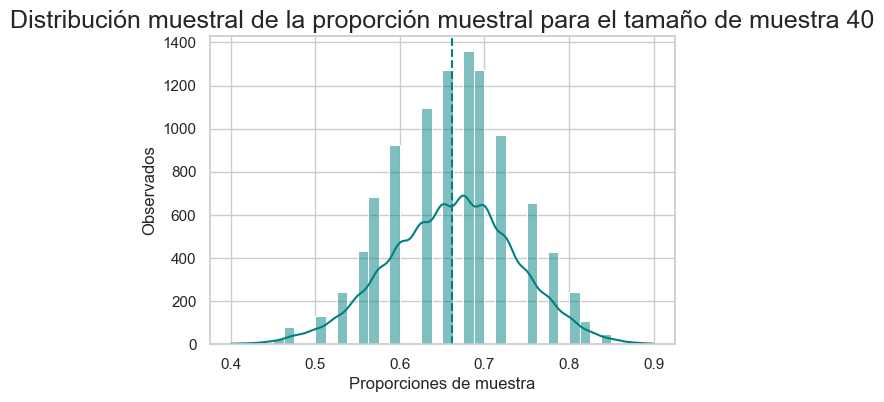

In [12]:
col='teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  
sns.histplot(x = 'sample_proportion', data=entire_home, bins=40, kde=True, color=col) 
plt.axvline(x= np.mean(entire_home['sample_proportion']), color=col, linestyle='--')

plt.title('Distribución muestral de la proporción muestral para el tamaño de muestra 40', fontsize=18)
plt.xlabel('Proporciones de muestra', fontsize=12)
plt.ylabel('Observados', fontsize=12)
plt.show()

Ahora podemos visualizar la distribución muestral de las proporciones de muestra para muestras de tamaño 40 utilizando un histograma. Es importante tener en cuenta que, en el mundo real, no tenemos acceso a toda la población. Por lo tanto, no podemos tomar muchas muestras ni construir o visualizar realmente la distribución muestral. Hemos creado este ejemplo en particular de manera que sí tenemos acceso a la población completa, lo que nos permite visualizar directamente la distribución muestral con fines educativos.

La distribución muestral parece tener forma de campana, es aproximadamente simétrica y tiene un solo pico. Está centrada alrededor de 0.65 y las proporciones de muestra van desde aproximadamente 0.5 hasta alrededor de 0.8. De hecho, podemos calcular la media de las proporciones de muestra.

In [13]:
entire_home['sample_proportion'].describe()

count    10000.000000
mean         0.661878
std          0.074141
min          0.400000
25%          0.600000
50%          0.675000
75%          0.700000
max          0.900000
Name: sample_proportion, dtype: float64

Estos estadísticos proporcionan una visión completa de la distribución de las proporciones de muestra y nos ayudan a comprender la variabilidad y la tendencia central de nuestros datos muestrales en relación con los listados de Airbnb en Berlín.

- count: Indica el número total de observaciones en nuestra muestra, que en este caso es 10,000.

- mean: Es la media de todas las proporciones de muestra calculadas, que es aproximadamente 0.661. Esto sugiere que, en promedio, alrededor del 66.1% de las muestras seleccionadas aleatoriamente tienen listados de tipo "Entire home/apt" (apartamento completo o casa).

- std: Representa la desviación estándar de las proporciones de muestra, que es aproximadamente 0.074. Esta medida de dispersión indica cuánto varían las proporciones de muestra alrededor de la media. En este caso, las proporciones de muestra tienden a estar dispersas alrededor de la media en aproximadamente 0.074 unidades.

- min: Es el valor mínimo de las proporciones de muestra observadas, que es 0.35. Esto indica que la proporción más baja de apartamentos completos/casas en nuestras muestras fue del 35%.

- El 25% (primer cuartil) de las proporciones de muestra es igual o menor a 0.6.

- El 50% (mediana) de las proporciones de muestra es igual a 0.65, lo que significa que el 50% de las muestras tienen una proporción de apartamentos completos/casas de 0.65 o menos.

- El 75% (tercer cuartil) de las proporciones de muestra es igual o menor a 0.7.

- max: Es el valor máximo de las proporciones de muestra observadas, que es 0.9. Indica que la proporción más alta de apartamentos completos/casas en nuestras muestras fue del 90%.

<h2>La Importancia de la Distribución Muestral para Medias en Estadística Inferencial</h2>

La distribución muestral para medias es fundamental en estadística inferencial, permitiéndonos comprender el comportamiento de las medias de múltiples muestras aleatorias de una población. Al tomar muestras repetidas de una población y calcular la media de cada muestra, observamos que estas medias muestrales también tienen una distribución propia. Esta distribución suele seguir una forma normal o gaussiana, especialmente cuando el tamaño de la muestra es grande, según el Teorema del Límite Central. La media de la distribución muestral para medias es equivalente a la media de la población, mientras que su desviación estándar, conocida como error estándar de la media, se calcula dividiendo la desviación estándar de la población por la raíz cuadrada del tamaño de la muestra. A medida que aumenta el tamaño de la muestra, la distribución muestral para medias se estrecha y se aproxima más a una distribución normal.

En contraste, en la sección anterior nuestra variable de interés, room_type, era categórica y el parámetro de la población era una proporción. Como se menciona en la introducción del capítulo, existen múltiples opciones de parámetros de población para cada tipo de variable. Si queremos inferir algo sobre una población de variables cuantitativas, como el precio por noche de los listados de Airbnb en Berlín, podríamos estimar la media poblacional para ayudar a los viajeros a determinar si un alojamiento específico tiene un precio elevado. La distribución de la población del precio por noche puede ser visualizada mediante un histograma, proporcionando una representación gráfica de la variabilidad y distribución de los precios en la población estudiada.

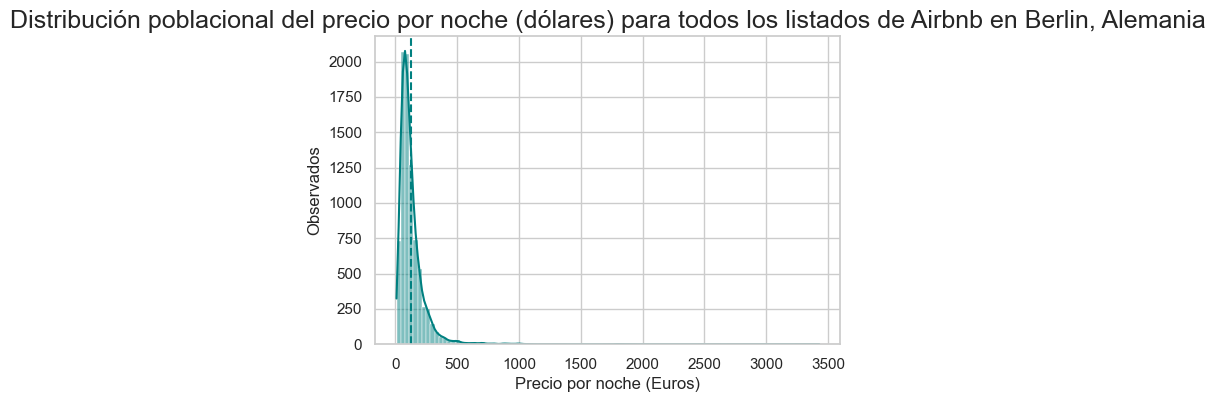

In [14]:
sns.histplot(x = 'price', data=data, bins=100, kde=True, color=col)
plt.axvline(x= np.mean(data['price']), color=col, linestyle='--')

plt.title('Distribución poblacional del precio por noche (dólares) para todos los listados de Airbnb en Berlin, Alemania', fontsize=18)
plt.xlabel('Precio por noche (Euros)', fontsize=12)
plt.ylabel('Observados', fontsize=12)
plt.show()

Al explorar la distribución de la población de precios por noche de los listados de Airbnb en Berlín, observamos que presenta un solo pico, lo que indica que hay un valor predominante alrededor del cual se concentran la mayoría de los precios. Sin embargo, esta distribución también exhibe sesgo, lo que significa que no es simétrica. En este caso particular, la mayor parte de los alojamientos tienen un precio por noche inferior a 128 dólares, pero hay algunos listados que tienen precios considerablemente más altos, lo que se refleja en una cola larga en el lado derecho del histograma.

Este patrón de distribución sugiere que mientras la mayoría de los alojamientos son relativamente asequibles, existen algunos que son significativamente más caros. Este fenómeno es importante de entender para los viajeros que desean hacer una estimación realista del costo de hospedaje en la ciudad. Además de la visualización gráfica de la distribución, es posible calcular la media poblacional, es decir, el promedio del precio por noche para todos los listados de Airbnb en Berlín. Este valor promedio proporciona una medida central que ayuda a entender el costo típico de alojamiento en la ciudad, facilitando a los viajeros la evaluación de si un determinado listado está por encima o por debajo de la media general de precios.

In [15]:
data['price'].describe()

count    8400.000000
mean      128.425714
std       124.398528
min         9.000000
25%        67.000000
50%        99.000000
75%       150.000000
max      3429.000000
Name: price, dtype: float64

El precio promedio por noche de todos los alquileres de Airbnb en Berlín es de 128,42 dólares, lo cual representa nuestro parámetro de población al calcularlo utilizando los datos de toda la población disponible.

Ahora, supongamos que no tenemos acceso a los datos de toda la población (¡lo cual suele ser el caso!). Sin embargo, nos interesa estimar el promedio del precio por noche. Podríamos abordar esta pregunta tomando una muestra aleatoria de tantos listados de Airbnb como nos permitan nuestros recursos y tiempo. Supongamos que podemos hacer esto con 40 listados. ¿Cómo se vería una muestra de este tipo? Para explorar esta cuestión, podemos aprovechar nuestro acceso actual a los datos de la población y simular el proceso de tomar una muestra aleatoria de 40 listados utilizando Python, nuevamente utilizando la función sample.

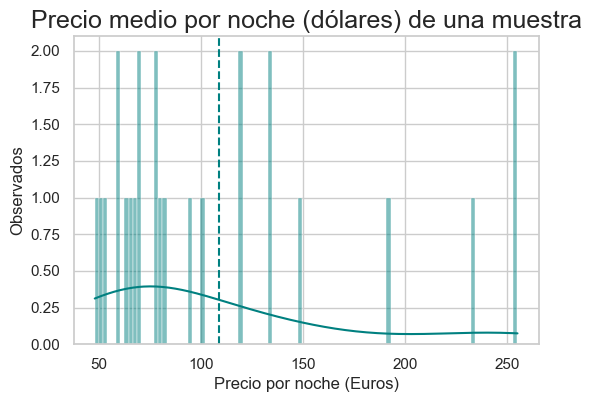

In [16]:
sample = data.sample(n=40)

sns.histplot(x = 'price', data=sample, bins=100, kde=True, color=col)
plt.axvline(x= np.mean(sample['price']), color=col, linestyle='--')

plt.title('Precio medio por noche (dólares) de una muestra', fontsize=18)
plt.xlabel('Precio por noche (Euros)', fontsize=12)
plt.ylabel('Observados', fontsize=12)
plt.show()

En este escenario específico, al tomar una muestra aleatoria de 40 listados de Airbnb en Berlín, notamos que la distribución de los precios por noche en la muestra presenta diferencias significativas en comparación con la distribución de precios en toda la población de listados. Mientras que la población completa tiene un precio promedio de 128.42 dólares por noche, nuestra muestra de 40 listados muestra un precio promedio de 104.04 dólares por noche.

Esta disparidad entre la muestra y la población puede atribuirse a la variabilidad inherente que se espera al tomar muestras aleatorias. Las muestras más pequeñas pueden no capturar completamente la amplia gama de precios que existe en toda la población de listados de Airbnb en Berlín. Es importante reconocer estas diferencias al interpretar los resultados de la muestra y al realizar inferencias sobre la población en general.

Estos hallazgos destacan la importancia de entender cómo se comportan las muestras en relación con la población subyacente, especialmente cuando se utilizan para hacer estimaciones sobre parámetros poblacionales como el precio promedio por noche.

In [17]:
sample.describe()

,id,accommodates,bathrooms,bedrooms,beds,price
count,4.000000e+01,40.000000,25.000000,36.000000,25.00000,25.000000
mean,3.573757e+17,2.875000,1.160000,1.361111,1.68000,108.640000
std,4.542875e+17,1.712511,0.374166,0.798312,1.40594,62.980076
min,1.314489e+06,1.000000,1.000000,0.000000,1.00000,48.000000
25%,1.928660e+07,2.000000,1.000000,1.000000,1.00000,66.000000
50%,4.097990e+07,2.000000,1.000000,1.000000,1.00000,80.000000
75%,8.412844e+17,4.000000,1.000000,2.000000,2.00000,134.000000
max,1.079568e+18,11.000000,2.000000,5.000000,7.00000,255.000000


Entonces, nuestra estimación estuvo bastante cerca del parámetro de la población: la media estuvo aproximadamente un 0.7% fuera. Es importante destacar que usualmente no podemos calcular la precisión de la estimación en la práctica, ya que no tenemos acceso al parámetro de la población; si lo tuviéramos, ¡no necesitaríamos estimarlo!

Además, recordemos que la estimación puntual puede variar; si tomáramos otra muestra aleatoria de la población, el valor de nuestra estimación podría cambiar. Entonces, ¿acaso tuvimos suerte con nuestra estimación puntual anterior? ¿Cuánto varía nuestra estimación a través de diferentes muestras de tamaño 40 en este ejemplo? Una vez más, dado que tenemos acceso a la población, podemos tomar muchas muestras y graficar la distribución muestral de las medias muestrales para entender esta variabilidad. En este caso, utilizaremos las 10,000 muestras de tamaño 40 que ya almacenamos en la variable samples. Primero calcularemos la media muestral para cada réplica y luego graficaremos la distribución muestral de las medias muestrales para muestras de tamaño 40.

In [18]:
estimates = samples.groupby("replicate")["price"].mean().reset_index().rename(columns={"price": "mean_price"})

estimates.head()

,replicate,mean_price
0,0,95.758621
1,1,83.192308
2,2,256.888889
3,3,127.250000
4,4,118.190476


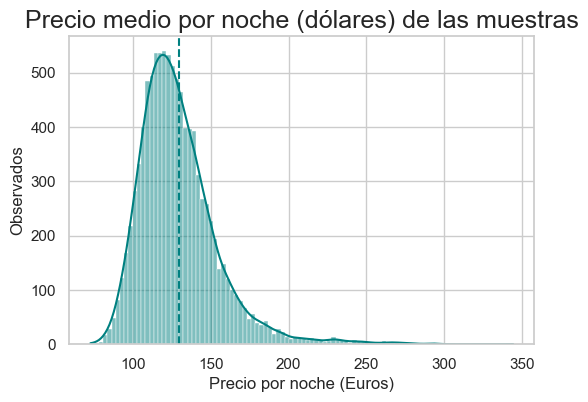

In [19]:
sns.histplot(x = 'mean_price', data=estimates, bins=100, kde=True, color=col)
plt.axvline(x= np.mean(estimates['mean_price']), color=col, linestyle='--')

plt.title('Precio medio por noche (dólares) de las muestras', fontsize=18)
plt.xlabel('Precio por noche (Euros)', fontsize=12)
plt.ylabel('Observados', fontsize=12)
plt.show()

La distribución muestral de la media presenta un único pico y tiene forma de campana. La mayoría de las estimaciones se encuentran entre aproximadamente 100 y 150 dólares; sin embargo, hay una buena cantidad de casos fuera de este rango (es decir, donde la estimación puntual no estuvo cerca del parámetro de la población). Parece que realmente tuvimos suerte al estimar la media poblacional con solo un error del 0.7%.

<h2>¿Cómo se comparan gráficamente las muestras con la gráfica de la población?</h2>

Visualicemos la distribución de la población, la distribución de la muestra y la distribución muestral para comparar cómo se comportan estas tres conjuntos de datos. Al observar estas distribuciones, podemos notar que los centros de cada una están aproximadamente alrededor del mismo precio, alrededor de 124 dólares. La distribución original de la población muestra una cola larga hacia la derecha, indicando que hay algunos listados con precios significativamente más altos que la mayoría. Por otro lado, la distribución de la muestra muestra una forma similar a la de la distribución poblacional, lo cual sugiere que la muestra captura de manera efectiva la estructura general de precios de la población.

En contraste, la distribución muestral de las medias no replica la forma exacta de la población ni de la muestra individual, sino que presenta una forma de campana. Esta distribución muestral tiene una dispersión menor en comparación con las distribuciones de la población y de la muestra individual. Las medias muestrales tienden a variar menos que las observaciones individuales debido a que en cualquier muestra aleatoria pueden encontrarse tanto valores altos como bajos, lo cual tiende a equilibrar el promedio y evitar que sea demasiado extremo en cualquier dirección. Esta observación subraya la utilidad de la distribución muestral para entender la variabilidad y la precisión de las estimaciones basadas en muestras aleatorias de una población más amplia.

In [20]:
estimates.describe()

,replicate,mean_price
count,10000.00000,10000.000000
mean,4999.50000,129.045754
std,2886.89568,25.599459
min,0.00000,72.277778
25%,2499.75000,112.146825
50%,4999.50000,124.811254
75%,7499.25000,140.486111
max,9999.00000,344.500000


<h2>Conclusión</h2>

En este análisis, hemos explorado la distribución de precios por noche de los listados de Airbnb en Berlín mediante tres perspectivas: la población completa, una muestra aleatoria y la distribución muestral de las medias. Observamos que los precios tienden a centrarse alrededor de los 124 dólares en todas las distribuciones. La distribución de la población exhibe una cola larga hacia la derecha, indicando la presencia de algunos listados con precios notablemente elevados. Por otro lado, la muestra aleatoria captura de manera efectiva la forma general de la distribución poblacional.

La distribución muestral de las medias, en cambio, presenta una forma de campana y una menor dispersión en comparación con las distribuciones anteriores. Esto sugiere que, aunque las observaciones individuales pueden variar ampliamente, las medias muestrales tienden a ser más consistentes y cercanas al verdadero valor poblacional promedio debido a la cancelación de efectos extremos en las muestras aleatorias.

En conclusión, la visualización y comparación de estas tres distribuciones nos permiten entender cómo se comportan los precios de los listados de Airbnb en Berlín a nivel poblacional, en muestras individuales y en medias muestrales. Esta metodología es fundamental para realizar inferencias precisas sobre la población basadas en muestras, proporcionando insights valiosos para decisiones informadas en ámbitos como planificación de viajes, evaluación de mercado y análisis de políticas públicas.